A modern approach to reducing generalization error is to use a larger model that may be required to use regularization during training that keeps the weights of the model small. These techniques not only reduce overfitting, but they can also lead to faster optimization of the model and better overall performance.

This notebook will explore the problem of overfitting when training neural networks and how it can be addressed with regularization methods.

After reading, you will know:

- Underfitting can easily be addressed by increasing the capacity of the network, but overfitting requires the use of specialized techniques.
- Regularization methods like weight decay provide an easy way to control overfitting for large neural network models.
- A modern recommendation for regularization is to use early stopping with dropout and a weight constraint.

A model fit can be considered in the context of the bias-variance trade-off.

- An underfit model has high bias and low variance. Regardless of the specific samples in the training data, it cannot learn the problem. 
- An overfit model has low bias and high variance. The model learns the training data too well and performance varies widely with new unseen examples or even statistical noise added to examples in the training dataset.

#### addressing underfitting
- by increasing the capacity of the model. 
    - Capacity refers to the ability of a model to fit a variety of functions; more capacity, means that a model can fit more types of functions for mapping inputs to outputs. Increasing the capacity of a model is easily achieved by changing the structure of the model, such as adding more layers and/or more nodes to layers.

#### Diagnose overfitting
- diagnosed by monitoring the performance of the model during training by evaluating it on both a training dataset and on a holdout validation dataset. Graphing line plots of the performance of the model during training, called learning curves, will show a familiar pattern.

#### Address overfitting
There are two ways to approach an overfit model:
1. Reduce overfitting by training the network on more examples.
2. Reduce overfitting by changing the complexity of the network.

A model can overfit a training dataset because it has sufficient capacity to do so. Reducing the capacity of the model reduces the likelihood of the model overfitting the training dataset, to a point where it no longer overfits.
The capacity of a neural network model, it’s complexity, is defined by both it’s structure in terms of nodes and layers and the parameters in terms of its weights. Therefore, we can reduce the complexity of a neural network to reduce overfitting in one of two ways:
1. Change network complexity by changing the network structure (number of weights).
2. Change network complexity by changing the network parameters (values of weights).

- For network structure, it can be tuned such as via grid search until a suitable number of nodes and/or layers is found to reduce or remove overfitting for the problem. Alternately, the model could be overfit and pruned by removing nodes until it achieves suitable performance on a validation dataset.
- For network parameters, constrain the complexity of the model by ensuring the parameters (weights) of the model remain small. Small parameters suggest a less complex and, in turn, more stable model that is less sensitive to statistical fluctuations in the input data.

### Regularization
Techniques that seek to reduce overfitting (reduce generalization error) by keeping network weights small are referred to as regularization methods. More specifically, regularization refers to a class of approaches that add additional information to transform an ill-posed problem into a more stable well-posed problem.

>A problem is said to be ill-posed if small changes in the given information cause large changes in the solution. This instability with respect to the data makes solutions unreliable because small measurement errors or uncertainties in parameters may be greatly magnified and lead to wildly different responses.The idea behind regularization is to use supplementary information to restate an ill-posed problem in a stable form.— Page 266, Neural Smithing: Supervised Learning in Feedforward Artificial Neural Networks, 1999.

Below is a list of five of the most common additional regularization methods.
1. Activity Regularization: Penalize the model during training base on the magnitude of the activations.
2. Weight Constraint: Constrain the magnitude of weights to be within a range or below a limit.
3. Dropout: Probabilistically remove inputs during training.
4. Noise: Add statistical noise to inputs during training.
5. Early Stopping: Monitor model performance on a validation set and stop training when performance degrades.

#### 1. Activity Regularization in Keras

There are three different regularization techniques supported, each provided as a class in the keras.regularizers module:
- l1: Activity is calculated as the sum of absolute values.
- l2: Activity is calculated as the sum of the squared values.
- l1_l2: Activity is calculated as the sum of absolute and sum of the squared values.

Each of the l1 and l2 regularizers takes a single hyperparameter that controls the amount that each activity contributes to the sum. The l1_l2 regularizer takes two hyperparameters, one for each of the l1 and l2 methods.

In [ ]:
# The regularizer class must be imported and then instantiated; for example:
# import regularizer
from keras.regularizers import l1
# instantiate regularizer
reg = l1(0.001)

#### Activity Regularization on Layers

Activity regularization is specified on a layer in Keras.

This can be achieved by setting the activity_regularizer argument on the layer to an instantiated and configured regularizer class.

The regularizer is applied to the output of the layer, but you have control over what the “output” of the layer actually means. Specifically, you have flexibility as to whether the layer output means that the regularization is applied before or after the ‘activation‘ function.

For example, you can specify the function and the regularization on the layer, in which case activation regularization is applied to the output of the activation function, in this case, rectified linear activation function or ReLU.

In [ ]:
model.add(Dense(32, activation='relu', activity_regularizer=l1(0.001)))

Alternately, you can specify a linear activation function (the default, that does not perform any transform) which means that the activation regularization is applied on the raw outputs, then, the activation function can be added as a subsequent layer.

In [ ]:
model.add(Dense(32, activation='linear', activity_regularizer=l1(0.001)))
model.add(Activation('relu'))

The latter is probably the preferred usage of activation regularization in order to allow the model to learn to take activations to a true zero value in conjunction with the rectified linear activation function. 

In [ ]:
# MLP Activity Regularization
#The example below sets l1 norm activity regularization on a Dense fully connected layer.

# example of l1 norm on activity from a dense layer
from keras.layers import Dense
from keras.regularizers import l1
model.add(Dense(32, activity_regularizer=l1(0.001)))

In [ ]:
# CNN Activity Regularization
# The example below sets l1 norm activity regularization on a Conv2D convolutional layer.

# example of l1 norm on activity from a cnn layer
from keras.layers import Conv2D
from keras.regularizers import l1
model.add(Conv2D(32, (3,3), activity_regularizer=l1(0.001)))

In [ ]:
# RNN Activity Regularization
# The example below sets l1 norm activity regularization on an LSTM recurrent layer.

# example of l1 norm on activity from an lstm layer
from keras.layers import LSTM
from keras.regularizers import l1
model.add(LSTM(32, activity_regularizer=l1(0.001)))

### Activity Regularization Case Study Using Multilayer Perceptron
#### Binary Classification Problem

We will use a standard binary classification problem that defines two two-dimensional concentric circles of observations, one circle for each class.

Each observation has two input variables with the same scale and a class output value of either 0 or 1. This dataset is called the “circles” dataset because of the shape of the observations in each class when plotted.

We can use the [sklearn.datasets.make_circle()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) function to generate observations from this problem. We will add noise to the data and seed the random number generator so that the same samples are generated each time the code is run.

In [1]:
# generate two circles dataset
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
import pandas as pd
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

We can plot the dataset where the two variables are taken as x and y coordinates on a graph and the class value is taken as the color of the observation.

In [3]:
X[:5]

array([[-0.63640493, -0.36870191],
       [-0.24465976, -0.73659196],
       [-0.46597138, -1.06687743],
       [-0.70999784, -0.40841948],
       [ 0.70232238, -0.51730147]])

In [4]:
y[:5]

array([1, 1, 0, 1, 1])

In [5]:
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df.head()

,x,y,label
0,-0.636405,-0.368702,1
1,-0.244660,-0.736592,1
2,-0.465971,-1.066877,0
3,-0.709998,-0.408419,1
4,0.702322,-0.517301,1


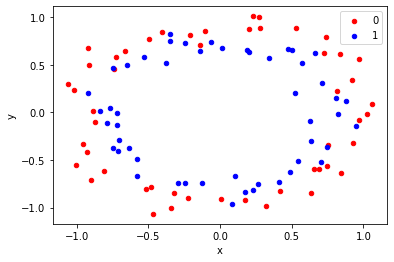

In [6]:
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

This is a good test problem because the classes cannot be separated by a line, e.g. are not linearly separable, requiring a nonlinear method such as a neural network to address.

We have only generated 100 samples, which is small for a neural network, providing the opportunity to overfit the training dataset and have higher error on the test dataset: a good case for using regularization.

Further, the samples have noise, giving the model an opportunity to learn aspects of the samples that don’t generalize.

### Overfit Multilayer Perceptron
Before we define the model, we will split the dataset into train and test sets, using 30 examples to train the model and 70 to evaluate the fit model’s performance.

In [7]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y, test_y = train_test_split(X,y,test_size=0.7)

#### Define the model
The model will have one hidden layer with more nodes that may be required to solve this problem, providing an opportunity to overfit. 

The hidden layer uses 500 nodes and the rectified linear activation function. A sigmoid activation function is used in the output layer in order to predict class values of 0 or 1.

The model is optimized using the binary cross entropy loss function, suitable for binary classification problems and the efficient Adam version of gradient descent.

In [10]:
# define model
from keras.layers import Dense
from keras.models import Sequential
def baseline_model():
    model = Sequential()
    model.add(Dense(500, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#### fit on the training data for 4,000 epochs and the default batch size of 32.

In [11]:
# fit model
history = baseline_model().fit(train_X, train_y, validation_data=(test_X, test_y), epochs=4000, verbose=0)

#### Evaluate the performance

In [12]:
# evaluate the model
_, train_acc =built_model().evaluate(train_X, train_y, verbose=0)
_, test_acc = built_model().evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.600, Test: 0.486


### Plot the performance
If the model does indeed overfit the training dataset, we would expect the line plot of accuracy on the training set to continue to increase and the test set to rise and then fall again as the model learns statistical noise in the training dataset.

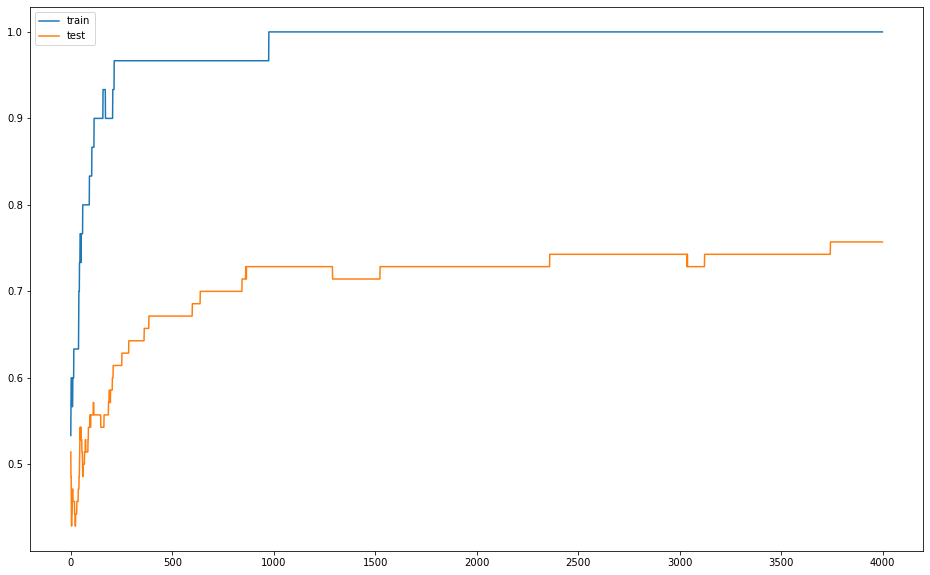

In [13]:
# plot history
fig =plt.figure(figsize=(16,10))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

#### the complete example is listed below.

In [ ]:
# mlp overfit on the two circles dataset
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

from keras.layers import Dense
from keras.models import Sequential

from matplotlib import pyplot as plt

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
train_X,test_X,train_y, test_y = train_test_split(X,y,test_size=0.7)

# define model
def baseline_model():
    model = Sequential()
    model.add(Dense(500, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# fit model
history = baseline_model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(train_X, train_y, verbose=0)
_, test_acc = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

We can see that the model has better performance on the training dataset than the test dataset, one possible sign of overfitting.

Because the model is severely overfit, we generally would not expect much, if any, variance in the accuracy across repeated runs of the model on the same dataset.

A figure has been created showing line plots of the model accuracy on the train and test sets.

We can see the expected shape of an overfit model where test accuracy increases to a point and then begins to decrease again.

#### Overfit MLP With Activation Regularization
There are a few different regularization methods to choose from, but it is probably a good idea to use the most common, which is the L1 vector norm.

This regularization has the effect of encouraging a sparse representation (lots of zeros), which is supported by the rectified linear activation function that permits true zero values.

We can do this by using the keras.regularizers.l1 class in Keras.

We will configure the layer to use the linear activation function so that we can regularize the raw outputs, then add a relu activation layer after the regularized outputs of the layer. We will set the regularization hyperparameter to 1E-4 or 0.0001, found with a little trial and error.

In [ ]:
model.add(Dense(500, input_dim=2, activation='linear', activity_regularizer=l1(0.0001)))
# note that in this setting activity regularization is applied after linear activation function and 
# then the input of a relu activation layer will be the regularized outputs of previous layer.
model.add(Activation('relu'))

Train: 0.467, Test: 0.514


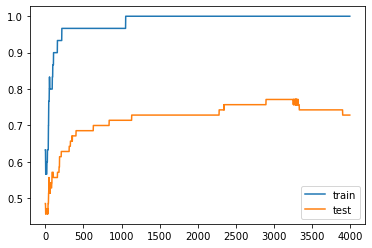

In [15]:
from keras.regularizers import l1
from keras.layers import Activation

# define activity regularization model that regularization before relu function
def L1_relu_model():
    model = Sequential()
    model.add(Dense(500, input_dim=2, activation='linear', activity_regularizer=l1(0.0001)))
    model.add(Activation('relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# fit model
history = L1_relu_model().fit(train_X, train_y, validation_data=(test_X, test_y), epochs=4000, verbose=0)

# evaluate the model
_, train_acc = L1_relu_model().evaluate(train_X, train_y, verbose=0)
_, test_acc = L1_relu_model().evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

For completeness, we can compare results to a version of the model where activity regularization is applied after the relu activation function.

In [ ]:
model.add(Dense(500, input_dim=2, activation='relu', activity_regularizer=l1(0.0001)))

Train: 0.567, Test: 0.529


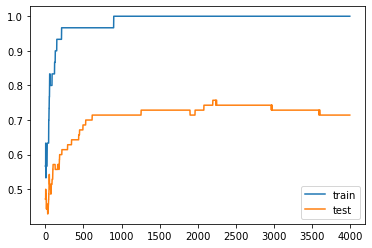

In [16]:
# define activity regularization model that regularization after relu function
def relu_L1_model():
    model = Sequential()
    model.add(Dense(500, input_dim=2, activation='relu', activity_regularizer=l1(0.0001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# fit model
history = relu_L1_model().fit(train_X, train_y, validation_data=(test_X, test_y), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = relu_L1_model().evaluate(train_X, train_y, verbose=0)
_, test_acc = relu_L1_model().evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

__This suggests that it may be worth experimenting with both approaches for implementing activity regularization with your own dataset, to confirm that you are getting the most out of the method.__